In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error



In [62]:
file_path = "/Users/manalalnamani/Desktop/DM/data.csv"

data = pd.read_csv(file_path)

data.head() 

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


checking type of the data

In [63]:
type(data) 

pandas.core.frame.DataFrame

In [64]:
data.shape 

(379, 13)

In [65]:
data.dtypes 

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

In [66]:
data.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [67]:
data = data.dropna()

In [68]:
data.isnull().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [69]:
data.shape 
# 5 rows removed

(374, 13)

In [70]:
# Checking data types for all columns:
data.dtypes

# three columns wih rong data type: price, battery life, and water resistance are numbers
#and they should not be objects 

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

In [71]:
#making Price (USD) column with correct data type
data['Price (USD)'] = data['Price (USD)'].replace({'\$': '', ',': ''},regex=True).astype('float64')

In [72]:
#making battery with correct data type
# Replace "48 hrs" with 2 days 
data["Battery Life (days)"] = data["Battery Life (days)"].replace("48 hours", 2)

#replace unlimited battery life with 100 days which is a high number that shouldreprsent high
# max battery life days is 72 days
data["Battery Life (days)"] = data["Battery Life (days)"].replace("Unlimited", 100)
# changing data type:
data['Battery Life (days)'] = data['Battery Life (days)'].astype('float64')



In [73]:
#making water resistance correct data type, by dropping "the row"
data = data[data["Water Resistance (meters)"] != "Not specified"]
#changing the dtata type:
data['Water Resistance (meters)'] = data['Water Resistance (meters)'].astype('float64')


In [74]:
#checking data types again:
data.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)    float64
Battery Life (days)          float64
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                  float64
dtype: object

Checking the shape again

In [75]:
#checking the shape again:
data.shape

#one extra row was dropped

(373, 13)

Heat Map for numerical features only (the floats) 

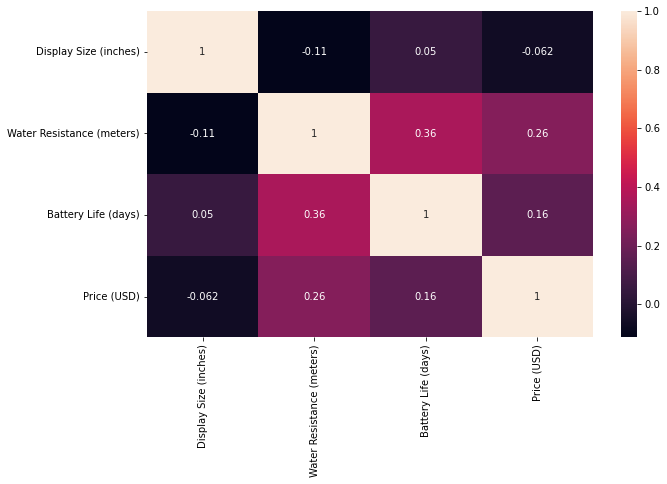

In [76]:
plt.figure(figsize=(10,6))
corr = data.corr()
#calculate the (correlation between variables in the DataFrame), the range of correlation from 1 to -1.
sns.heatmap(corr,annot=True)
plt.show()

Display Size above has weak correlation only -0.062 so not good feature close to 0

Statistics for nymerical columns

In [77]:
#statistics for only numerical features and also the price target in the dataset 
data.describe()

,Display Size (inches),Water Resistance (meters),Battery Life (days),Price (USD)
count,373.000000,373.000000,373.000000,373.000000
mean,1.356139,53.010724,12.935657,314.201072
std,0.171283,27.076329,14.675885,202.995974
min,0.900000,1.500000,1.000000,49.000000
25%,1.200000,50.000000,3.000000,199.000000
50%,1.390000,50.000000,10.000000,279.000000
75%,1.400000,50.000000,16.000000,329.000000
max,2.100000,200.000000,100.000000,1800.000000


shoe the histogram , Distribution of Numerical columns- using bins

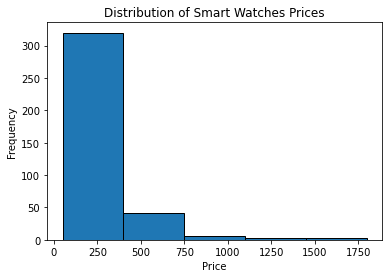

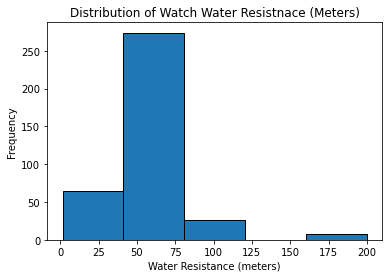

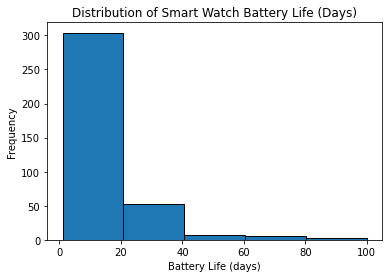

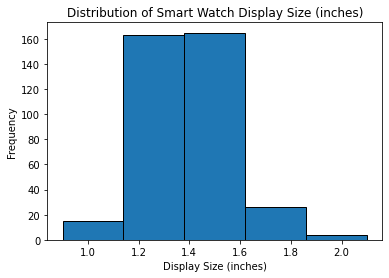

In [78]:
# describing the distribution using bins for numerical columns only
#Smart watch price
data['Price (USD)'].plot(kind = 'hist', bins = 5, edgecolor='black')  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Smart Watches Prices')
plt.show()
#Water Resistance:
data['Water Resistance (meters)'].plot(kind = 'hist', bins = 5, edgecolor='black')  
plt.xlabel('Water Resistance (meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Watch Water Resistnace (Meters)')
plt.show()
#Battery life:
data['Battery Life (days)'].plot(kind = 'hist', bins = 5, edgecolor='black')  
plt.xlabel('Battery Life (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Smart Watch Battery Life (Days)')
plt.show()
#Display Size:
data['Display Size (inches)'].plot(kind = 'hist', bins = 5, edgecolor='black')  
plt.xlabel('Display Size (inches)')
plt.ylabel('Frequency')
plt.title('Distribution of Smart Watch Display Size (inches)')
plt.show()


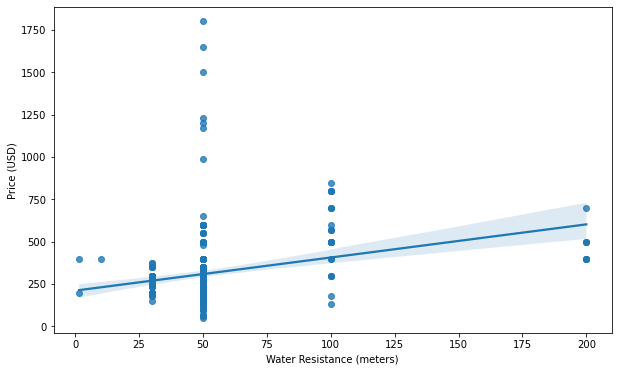

In [79]:
plt.figure(figsize=(10,6))
sns.regplot(x="Water Resistance (meters)", y="Price (USD)", data=data)
plt.show() # the pionts that above 1000 they are outliers then it will effect on the acc.

In [80]:
pearson_coefficient, P_value = stats.pearsonr(data['Water Resistance (meters)'], data['Price (USD)'])
print("Feature:Water Resistance:")
print("   Pearson Correlation Coefficient= ", pearson_coefficient)
print("   P-value= ", P_value)

Feature:Water Resistance:
   Pearson Correlation Coefficient=  0.26094821393598555
   P-value=  3.1933287998783804e-07


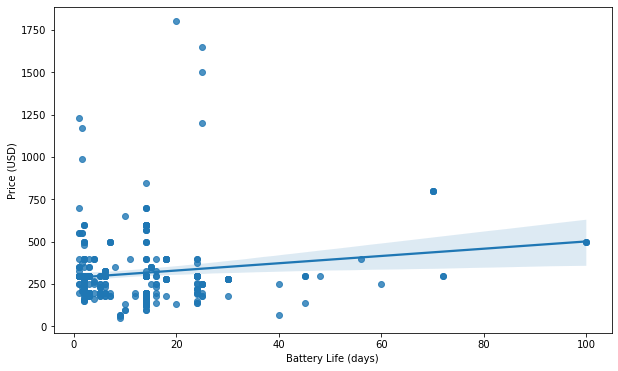

In [81]:
plt.figure(figsize=(10,6))
sns.regplot(x="Battery Life (days)", y="Price (USD)", data=data)
plt.show()

In [82]:
pearson_coefficient, P_value = stats.pearsonr(data['Battery Life (days)'], data['Price (USD)'])
print("Feature:Battery Life:")
print("   Pearson Correlation Coefficient= ", pearson_coefficient)
print("   P-value= ", P_value)


Feature:Battery Life:
   Pearson Correlation Coefficient=  0.15512749195860773
   P-value=  0.0026631542990407284


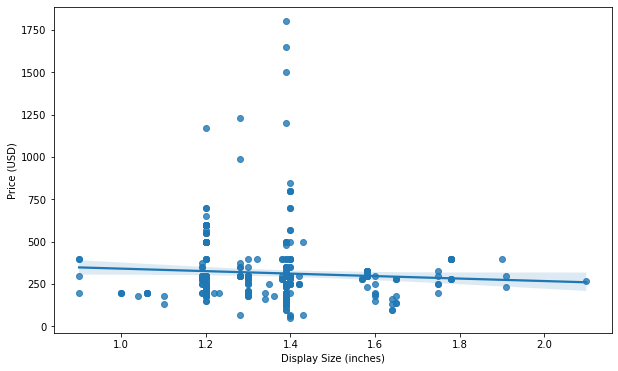

In [83]:
plt.figure(figsize=(10,6))
sns.regplot(x="Display Size (inches)", y="Price (USD)", data=data)
plt.show()

In [84]:
pearson_coefficient, P_value = stats.pearsonr(data['Display Size (inches)'], data['Price (USD)'])
print("Feature:Display Size:")
print("   Pearson Correlation Coefficient= ", pearson_coefficient)
print("   P-value= ", P_value)

Feature:Display Size:
   Pearson Correlation Coefficient=  -0.06176128590831645
   P-value=  0.23406946661022365


In [85]:
#statistics for only categorical columns in the dataset (objects)
data.describe(include = 'object') 

,Brand,Model,Operating System,Connectivity,Display Type,Resolution,Heart Rate Monitor,GPS,NFC
count,373,373,373,373,373,373,373,373,373
unique,41,134,33,5,26,35,1,2,2
top,Garmin,Sense,Wear OS,"Bluetooth, Wi-Fi",AMOLED,454 x 454,Yes,Yes,Yes
freq,34,15,131,292,206,90,373,347,315


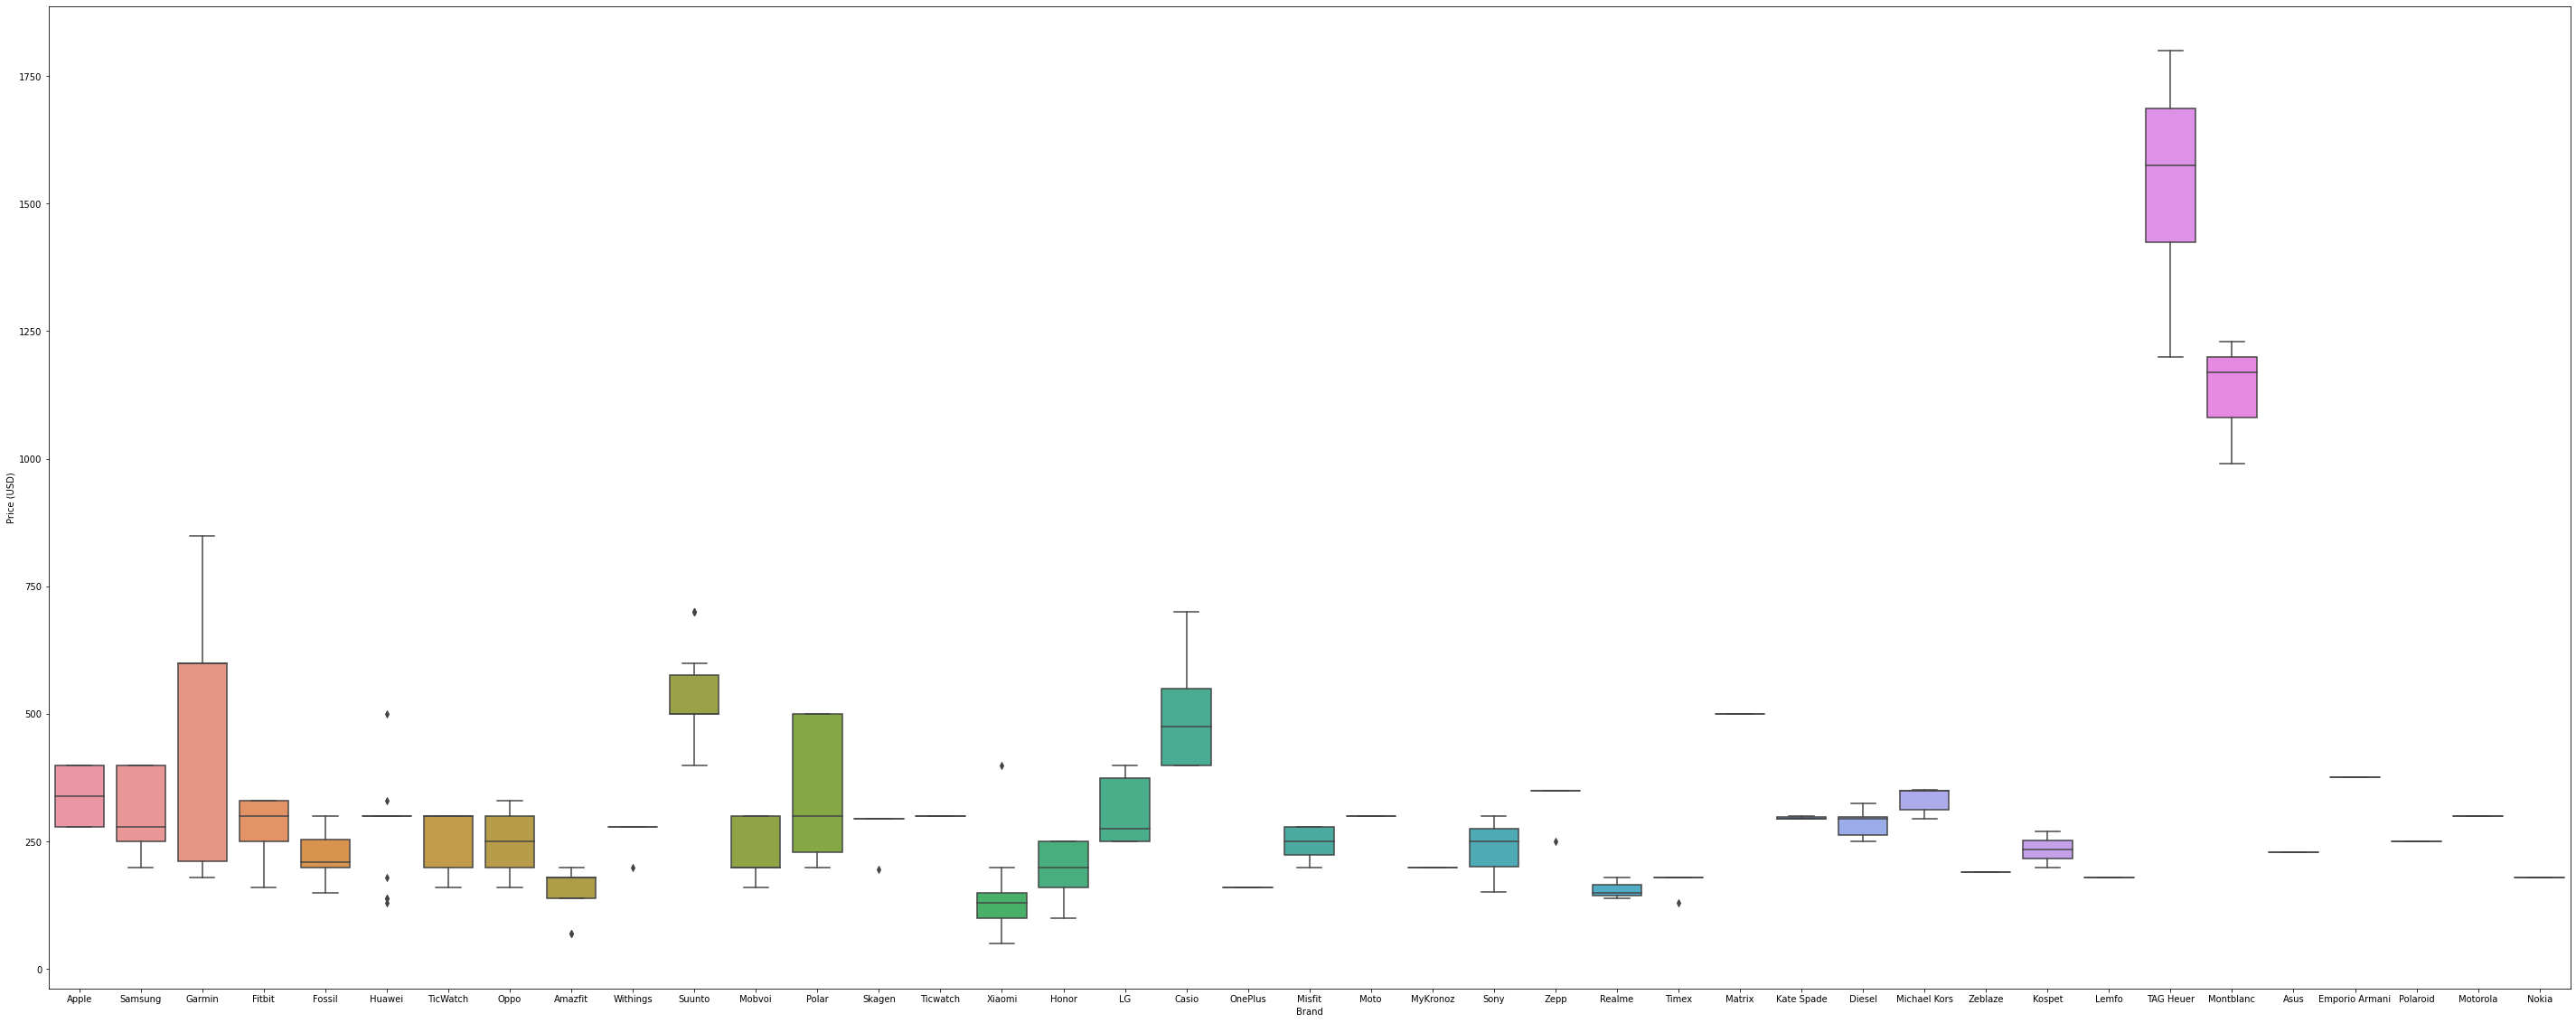

In [86]:
plt.figure(figsize=(50,20))
sns.boxplot(x="Brand", y="Price (USD)", data=data)
plt.show()

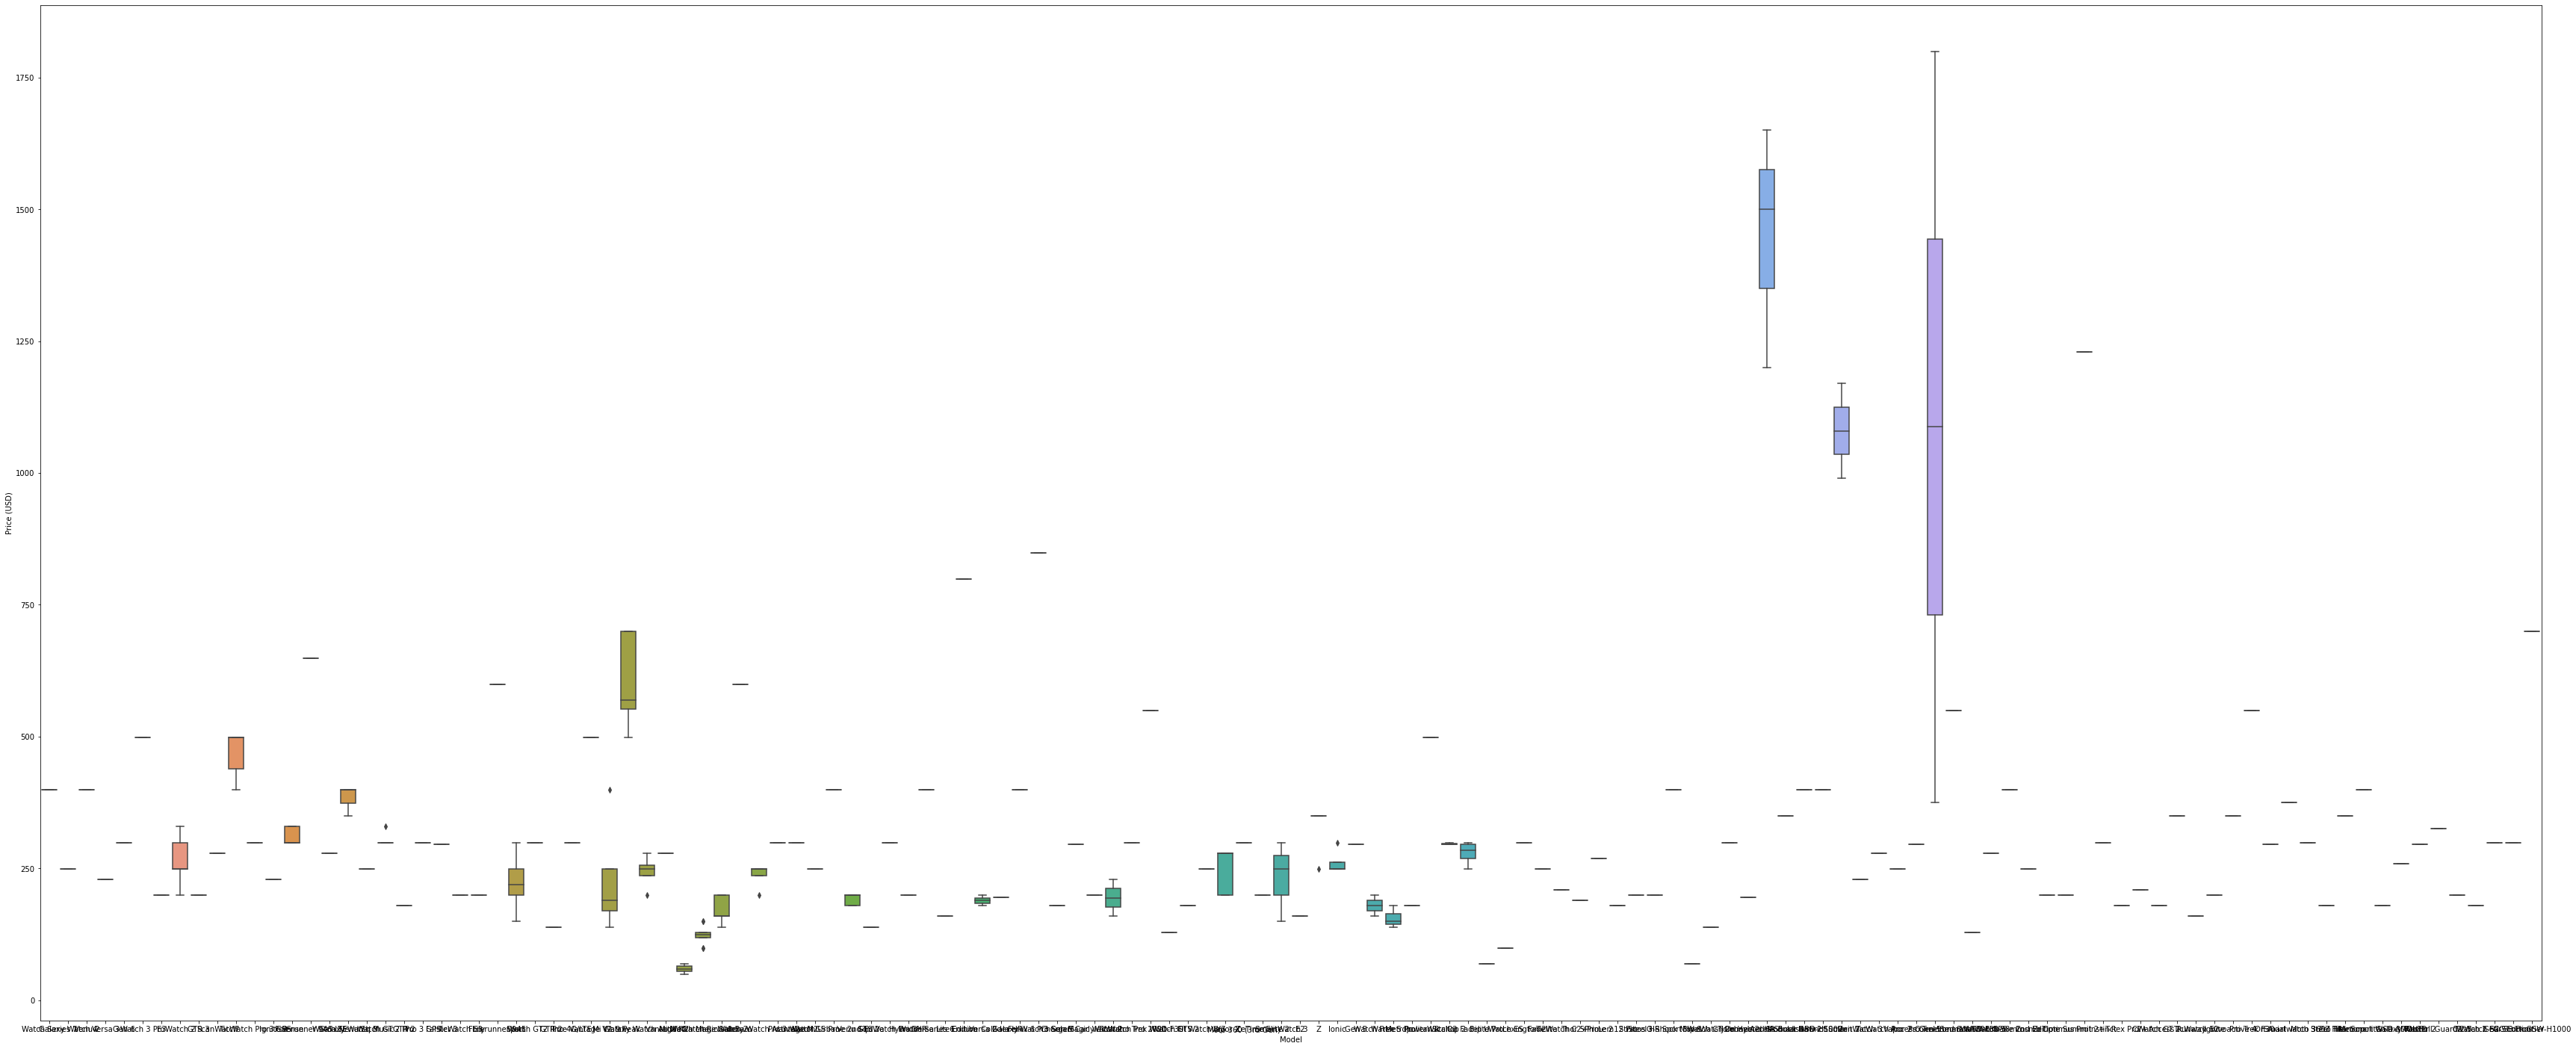

In [87]:
plt.figure(figsize=(60,25))
sns.boxplot(x="Model", y="Price (USD)", data=data)
plt.show()

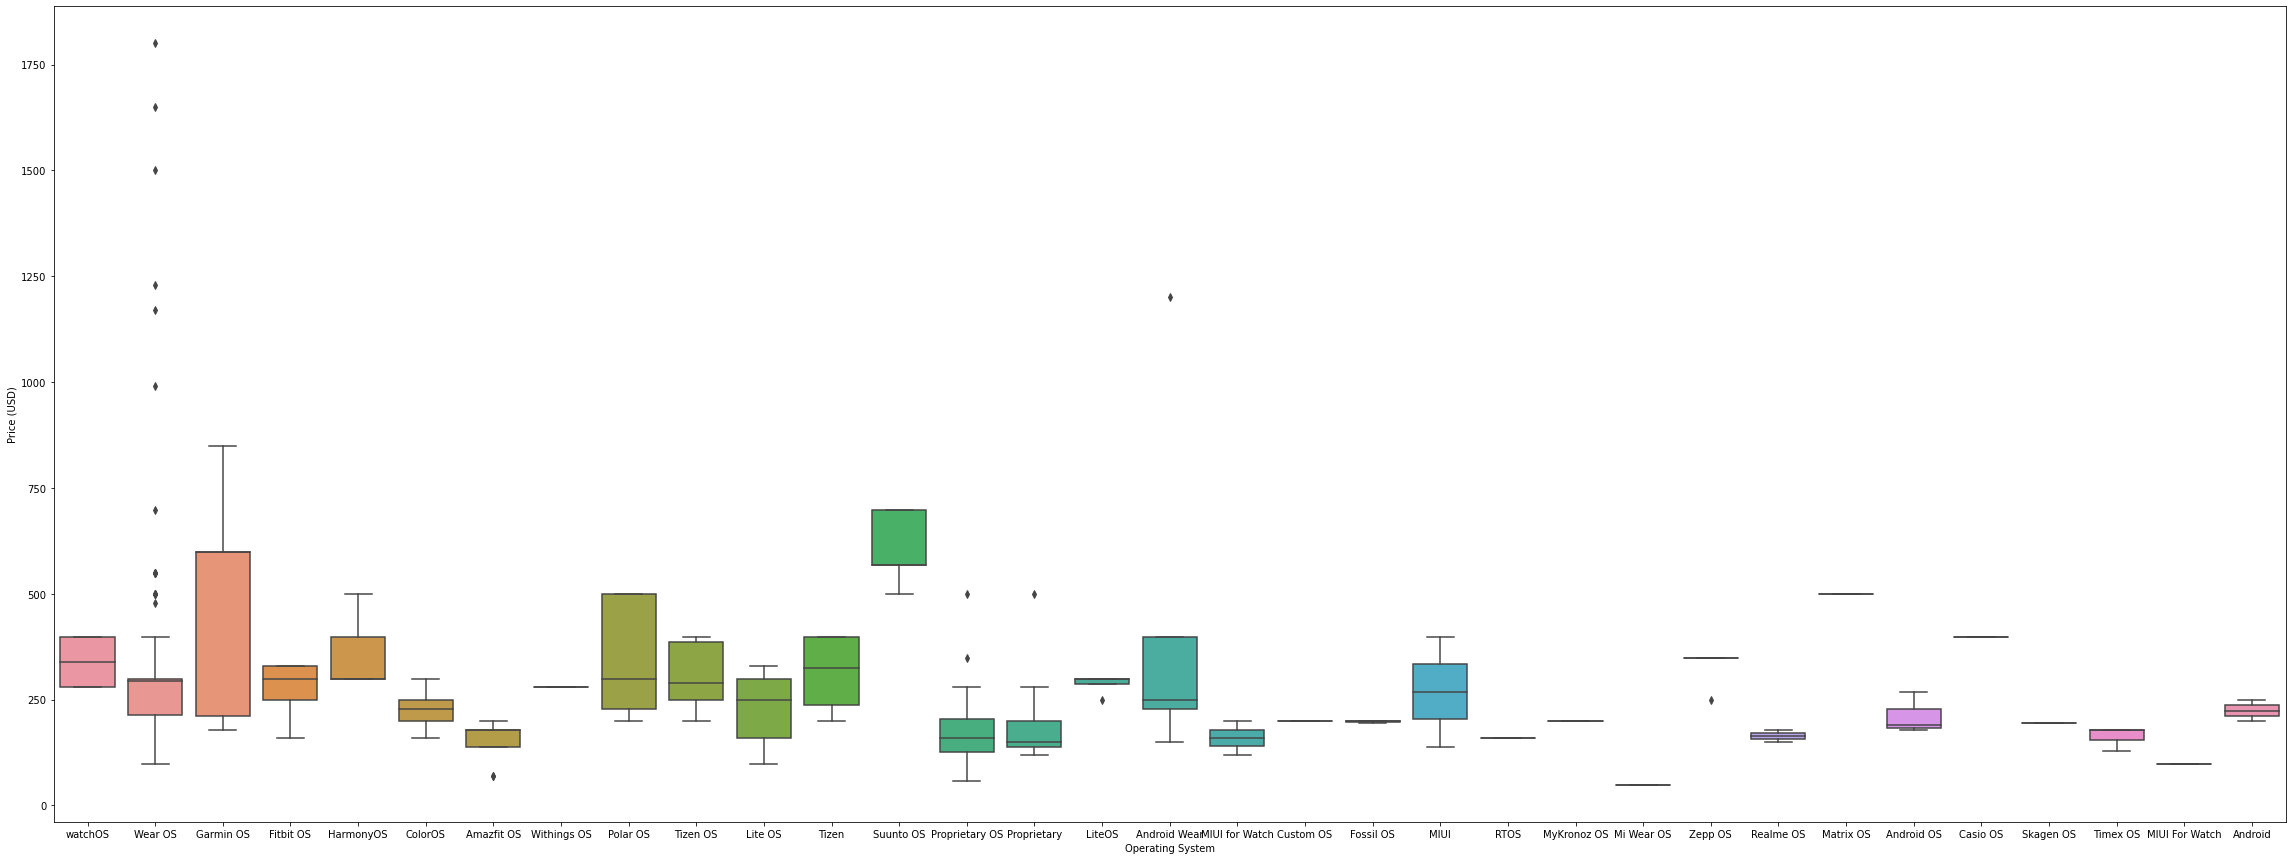

In [88]:
plt.figure(figsize=(40,15))
sns.boxplot(x="Operating System", y="Price (USD)", data=data)
plt.show()

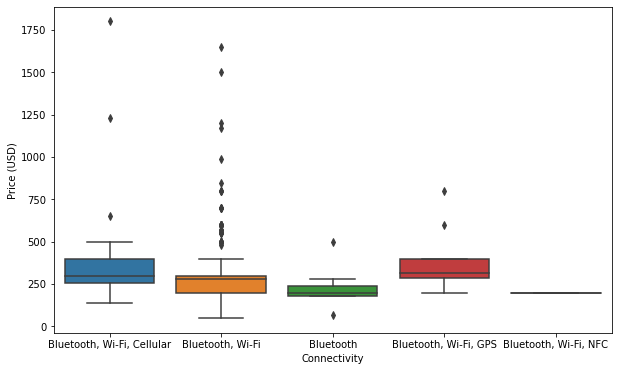

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Connectivity", y="Price (USD)", data=data)
plt.show()

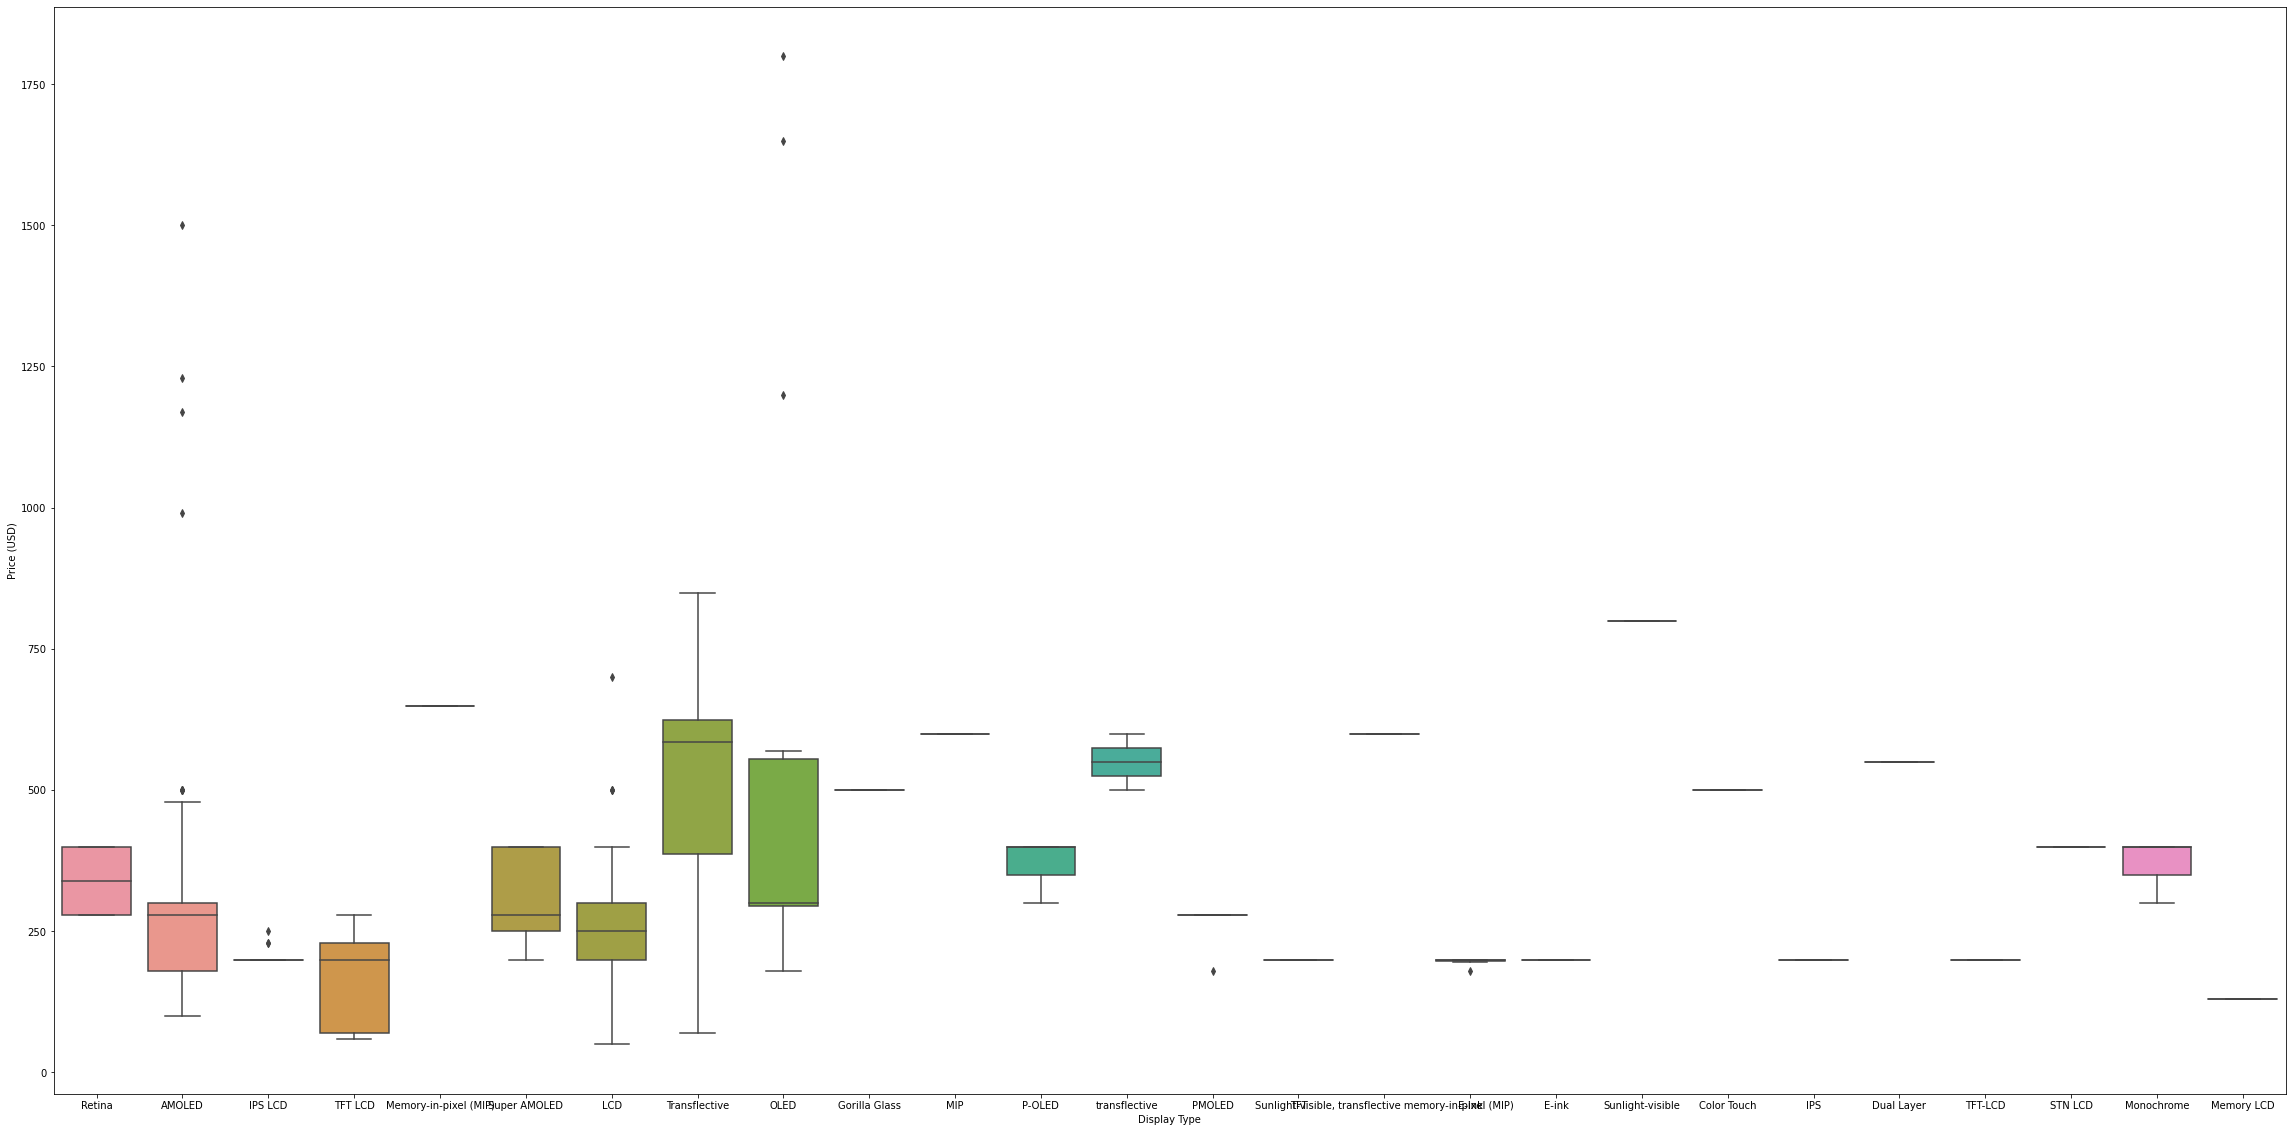

In [90]:
plt.figure(figsize=(40,20))
sns.boxplot(x="Display Type", y="Price (USD)", data=data)
plt.show()

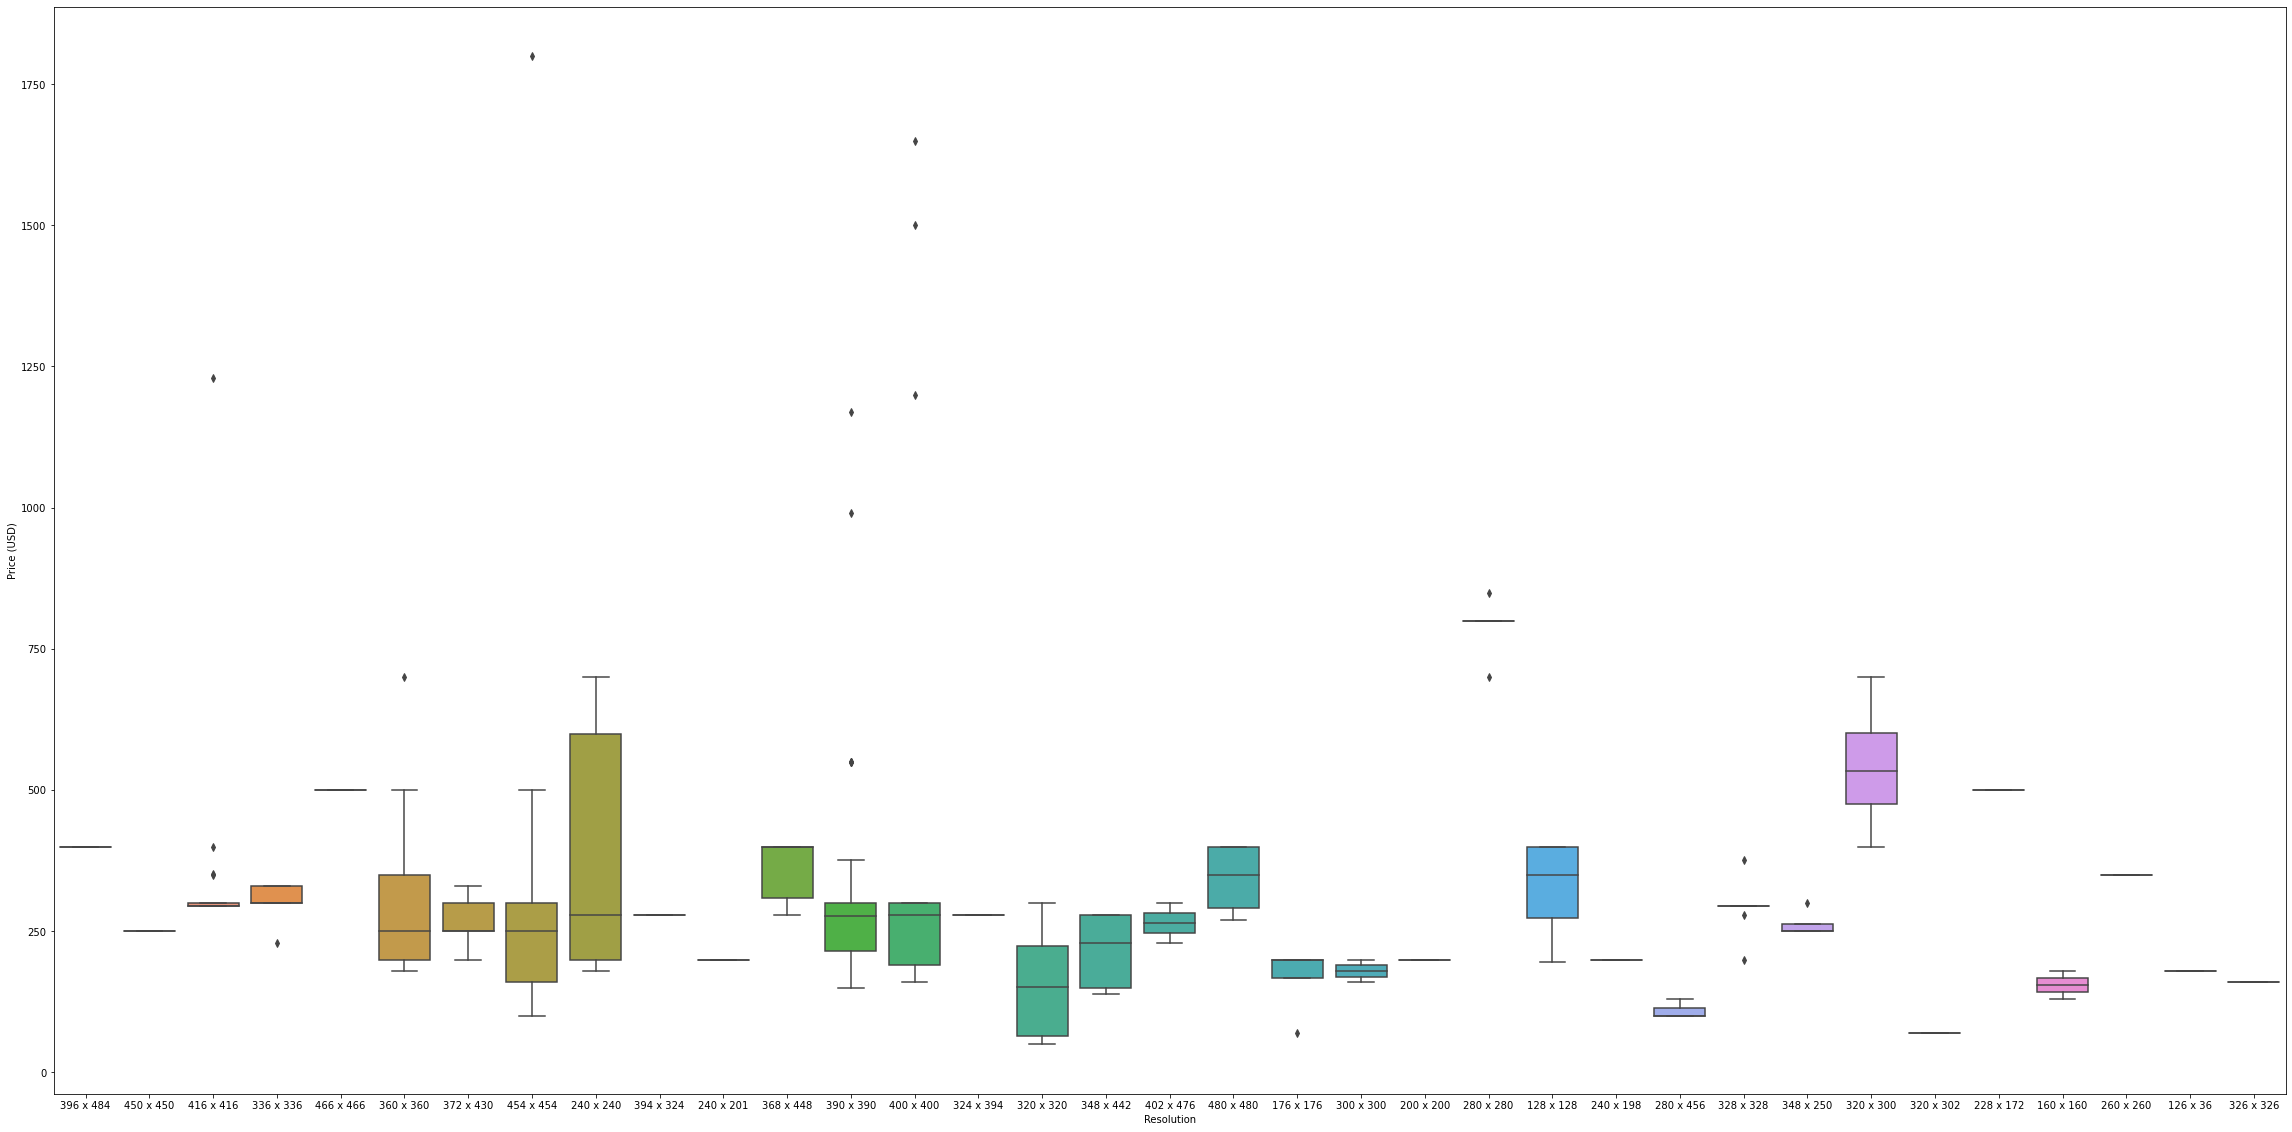

In [91]:
plt.figure(figsize=(40,20))
sns.boxplot(x="Resolution", y="Price (USD)", data=data)
plt.show()

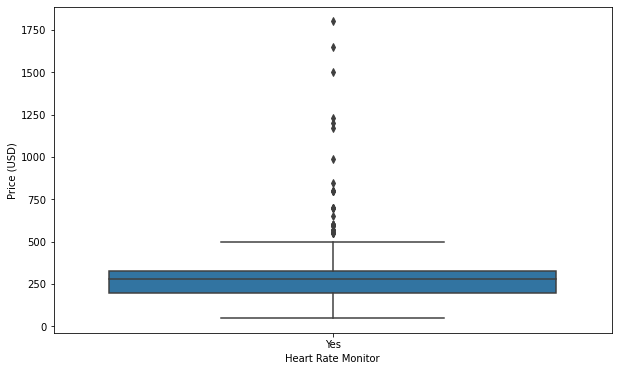

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Heart Rate Monitor", y="Price (USD)", data=data)
plt.show()

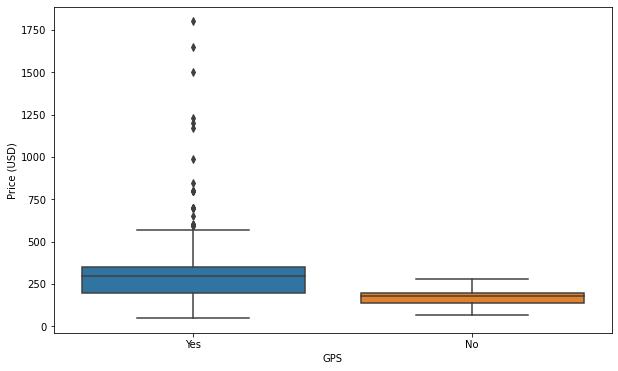

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(x="GPS", y="Price (USD)", data=data)
plt.show()

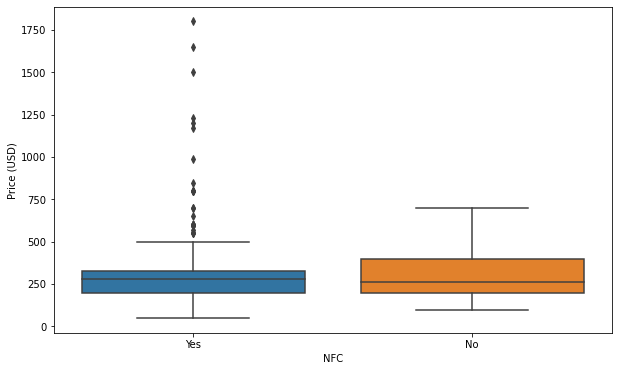

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x="NFC", y="Price (USD)", data=data)
plt.show()

In [95]:
#dropping the weak features (display size, model, heart rate monitor) cuz it will effect on the acc.
data.drop(['Heart Rate Monitor',"Model","Display Size (inches)"], axis = 1, inplace = True)


In [96]:
#dropping outliers
data = data.drop(data[data['Price (USD)'] > 1000].index)

In [97]:
data.shape
#now 10 columns
#now 367 rows 

(367, 10)

In [100]:
labelencoder = LabelEncoder()
data['Brand'] = labelencoder.fit_transform(data['Brand'])
data['Operating System'] = labelencoder.fit_transform(data['Operating System'])

data['Connectivity'] = labelencoder.fit_transform(data['Connectivity'])
data['Display Type'] = labelencoder.fit_transform(data['Display Type'])
data['Resolution'] = labelencoder.fit_transform(data['Resolution'])

data['GPS'] = labelencoder.fit_transform(data['GPS'])
data['NFC'] = labelencoder.fit_transform(data['NFC'])

In [102]:
data.head(5)
#label encoding is applied

,Brand,Operating System,Connectivity,Display Type,Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,1,32,2,16,27,50.0,18.0,1,1,399.0
1,29,29,2,0,31,50.0,40.0,1,1,249.0
2,8,9,1,0,30,50.0,11.0,1,0,399.0
3,6,7,1,0,19,50.0,6.0,1,1,229.0
4,7,29,1,0,30,30.0,24.0,1,1,299.0


In [103]:
##z-score
data = stats.zscore(data)

In [104]:
data.head()

,Brand,Operating System,Connectivity,Display Type,Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,-1.326816,1.199024,1.507435,1.097241,0.562768,-0.112261,0.348076,0.276127,0.433246,0.722427
1,0.944442,0.915309,1.507435,-0.761674,1.002909,-0.112261,1.844146,0.276127,0.433246,-0.330069
2,-0.759002,-0.976123,-0.400250,-0.761674,0.892874,-0.112261,-0.127946,0.276127,-2.308156,0.722427
3,-0.921234,-1.165267,-0.400250,-0.761674,-0.317513,-0.112261,-0.467962,0.276127,0.433246,-0.470402
4,-0.840118,0.915309,-0.400250,-0.761674,0.892874,-0.846007,0.756095,0.276127,0.433246,0.020763


In [105]:
#features (X) and targets (Y)
X = data.drop(columns=['Price (USD)']) 
y = data['Price (USD)']

In [106]:
# Split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
X_train.head()

,Brand,Operating System,Connectivity,Display Type,Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC
368,-0.759002,-0.976123,-0.40025,0.167784,-1.527900,-0.112261,-0.467962,0.276127,0.433246
203,1.431140,0.158736,-0.40025,-0.761674,0.342698,-0.846007,-0.535965,0.276127,-2.308156
293,-0.677885,-0.786980,-0.40025,-0.761674,1.112944,-0.112261,0.076064,0.276127,0.433246
275,1.431140,0.631594,-0.40025,0.400148,-2.188111,1.722104,0.484083,0.276127,-2.308156
183,0.052162,0.915309,-0.40025,-0.761674,1.112944,-0.112261,-0.671971,0.276127,0.433246


In [108]:
y_test.head()

109   -0.680901
266   -0.007303
48    -0.119570
29     0.722427
81    -0.680901
Name: Price (USD), dtype: float64

In [109]:
model = LinearRegression()
model_mlr = model.fit(X_train,y_train)

In [110]:
# Predict on the testing data
y_pred1 = model_mlr .predict(X_test)

In [112]:
mse1 = mean_squared_error(y_test, y_pred1)# it takes y-test and y-predict to compare the difference.
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.577532042783878


In [114]:
mae1= mean_absolute_error(y_test, y_pred1)# it takes y-test and y-predict to compare the difference.
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.6064554027659259


In [115]:
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)

In [116]:
# Predict on the testing data
y_pred_rf = model_rf.predict(X_test)

In [117]:
mse2 = mean_squared_error(y_test, y_pred_rf)
print('The mean square error for Random Forest Regression: ', mse2)

The mean square error for Random Forest Regression:  0.2610849891580437


In [118]:
mae2= mean_absolute_error(y_test, y_pred_rf)
print('The mean absolute error for Random Forest Regression: ', mae2)


The mean absolute error for Random Forest Regression:  0.3200640679809989


In [119]:
score = [('MLR', mae1),
          ('Random Forest', mae2)
         ]

In [120]:
#showing the errors in a data frame/table
mae = pd.DataFrame(data = score, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.606455
1,Random Forest,0.320064


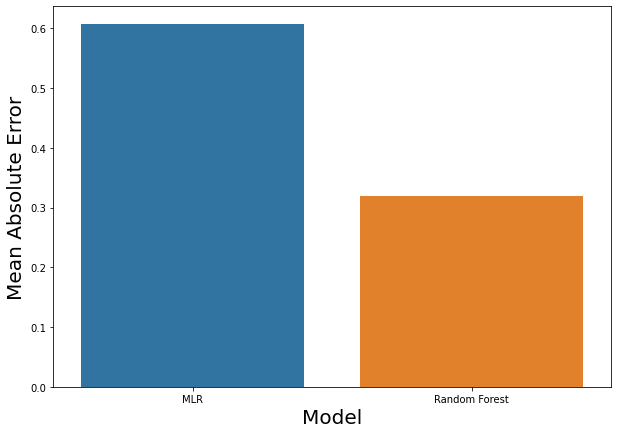

In [122]:
#plotting the error
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()